In [6]:
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import random
from adjustText import adjust_text
import numpy as np

In [3]:
test_degs = pd.read_csv('/Users/jacquelinechou/Downloads/s1_r5_Sublining fibroblasts_tb_degs.csv')

In [4]:
test_degs.head()

,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj
0,0,CXCL13,15.907592,2.723996,5.613132e-57,2.396807e-54
1,1,PTGDS,10.121619,1.310250,4.430259e-24,3.152868e-22
2,2,CXCL12,9.628829,0.287391,6.041374e-22,3.685238e-20
3,3,TRAC,8.578492,1.230151,9.612480e-18,5.130661e-16
4,4,IL7R,7.632358,1.278127,2.304984e-14,8.947529e-13


In [23]:
test_degs['nlog10_pval_adj'] = -np.log10(test_degs.pvals_adj)

In [24]:
test_degs.head()

,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,-log10(pvals_adj),nlog10(pvals_adj),nlog10_pval_adj
0,0,CXCL13,15.907592,2.723996,5.613132e-57,2.396807e-54,53.620367,53.620367,53.620367
1,1,PTGDS,10.121619,1.310250,4.430259e-24,3.152868e-22,21.501294,21.501294,21.501294
2,2,CXCL12,9.628829,0.287391,6.041374e-22,3.685238e-20,19.433534,19.433534,19.433534
3,3,TRAC,8.578492,1.230151,9.612480e-18,5.130661e-16,15.289827,15.289827,15.289827
4,4,IL7R,7.632358,1.278127,2.304984e-14,8.947529e-13,12.048297,12.048297,12.048297


In [25]:
test_degs.columns

Index(['Unnamed: 0', 'names', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj',
       '-log10(pvals_adj)', 'nlog10(pvals_adj)', 'nlog10_pval_adj'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


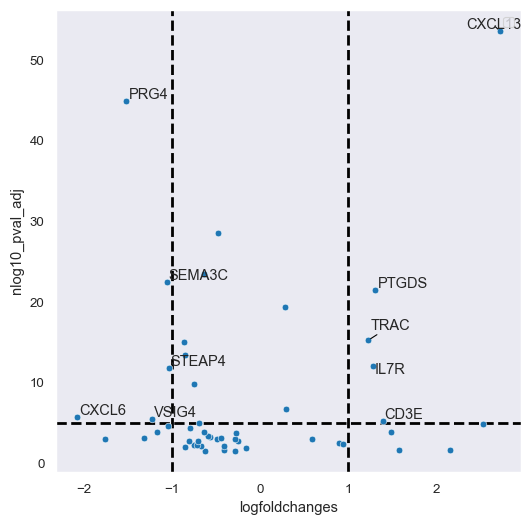

In [46]:
sns.set_style('dark')
sns.set_context('paper', font_scale= 1.1)
plt.figure(figsize = (6, 6))

ax = sns.scatterplot(data = test_degs, x = 'logfoldchanges', y = 'nlog10_pval_adj')
ax.axhline(5, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(-1, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(1, zorder = 0, c = 'k', lw = 2, ls = '--')

# Let's create a legend with the spatial domain labels

texts = []
for i in range(len(test_degs)):
    if test_degs.iloc[i].nlog10_pval_adj > 5 and abs(test_degs.iloc[i].logfoldchanges) > 1:
        texts.append(plt.text(test_degs.iloc[i].logfoldchanges, y = test_degs.iloc[i].nlog10_pval_adj, s = test_degs.iloc[i].names))
adjust_text(texts, arrowprops=dict(arrowstyle = '-', color = 'k'))

plt.legend()

In [59]:
highlighted_genes = test_degs[(test_degs['nlog10_pval_adj'] > 5) & (abs(test_degs['logfoldchanges']) > 1)]['names']

In [60]:
highlighted_genes

0     CXCL13
1      PTGDS
3       TRAC
4       IL7R
6       CD3E
39     VSIG4
40     CXCL6
42    STEAP4
45    SEMA3C
48      PRG4
Name: names, dtype: object

In [51]:
test_degs[(test_degs['nlog10_pval_adj'] > 5)]


,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,-log10(pvals_adj),nlog10(pvals_adj),nlog10_pval_adj
0,0,CXCL13,15.907592,2.723996,5.613132e-57,2.396807e-54,53.620367,53.620367,53.620367
1,1,PTGDS,10.121619,1.310250,4.430259e-24,3.152868e-22,21.501294,21.501294,21.501294
2,2,CXCL12,9.628829,0.287391,6.041374e-22,3.685238e-20,19.433534,19.433534,19.433534
3,3,TRAC,8.578492,1.230151,9.612480e-18,5.130661e-16,15.289827,15.289827,15.289827
4,4,IL7R,7.632358,1.278127,2.304984e-14,8.947529e-13,12.048297,12.048297,12.048297
5,5,VCAN,5.812358,0.291932,6.159879e-09,1.878763e-07,6.726128,6.726128,6.726128
6,6,CD3E,5.183709,1.392935,2.175169e-07,5.463512e-06,5.262528,5.262528,5.262528
38,38,MS4A6A,-5.061062,-0.692804,4.169273e-07,9.890443e-06,5.004784,5.004784,5.004784
39,39,VSIG4,-5.311557,-1.227106,1.086923e-07,2.900727e-06,5.537493,5.537493,5.537493
40,40,CXCL6,-5.412029,-2.078795,6.231451e-08,1.773886e-06,5.751074,5.751074,5.751074


In [50]:
test_degs(test_degs.nlog10_pval_adj > 5)


18

In [54]:
test_degs[(test_degs['nlog10_pval_adj'] > 5)]

,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,-log10(pvals_adj),nlog10(pvals_adj),nlog10_pval_adj
0,0,CXCL13,15.907592,2.723996,5.613132e-57,2.396807e-54,53.620367,53.620367,53.620367
1,1,PTGDS,10.121619,1.310250,4.430259e-24,3.152868e-22,21.501294,21.501294,21.501294
2,2,CXCL12,9.628829,0.287391,6.041374e-22,3.685238e-20,19.433534,19.433534,19.433534
3,3,TRAC,8.578492,1.230151,9.612480e-18,5.130661e-16,15.289827,15.289827,15.289827
4,4,IL7R,7.632358,1.278127,2.304984e-14,8.947529e-13,12.048297,12.048297,12.048297
5,5,VCAN,5.812358,0.291932,6.159879e-09,1.878763e-07,6.726128,6.726128,6.726128
6,6,CD3E,5.183709,1.392935,2.175169e-07,5.463512e-06,5.262528,5.262528,5.262528
38,38,MS4A6A,-5.061062,-0.692804,4.169273e-07,9.890443e-06,5.004784,5.004784,5.004784
39,39,VSIG4,-5.311557,-1.227106,1.086923e-07,2.900727e-06,5.537493,5.537493,5.537493
40,40,CXCL6,-5.412029,-2.078795,6.231451e-08,1.773886e-06,5.751074,5.751074,5.751074


In [56]:
test_degs[abs(test_degs['logfoldchanges']) > 1]

,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,-log10(pvals_adj),nlog10(pvals_adj),nlog10_pval_adj
0,0,CXCL13,15.907592,2.723996,5.613132e-57,2.396807e-54,53.620367,53.620367,53.620367
1,1,PTGDS,10.121619,1.310250,4.430259e-24,3.152868e-22,21.501294,21.501294,21.501294
3,3,TRAC,8.578492,1.230151,9.612480e-18,5.130661e-16,15.289827,15.289827,15.289827
4,4,IL7R,7.632358,1.278127,2.304984e-14,8.947529e-13,12.048297,12.048297,12.048297
6,6,CD3E,5.183709,1.392935,2.175169e-07,5.463512e-06,5.262528,5.262528,5.262528
7,7,CCR7,4.982082,2.527035,6.290357e-07,1.413675e-05,4.849650,4.849650,4.849650
8,8,CD3D,4.495088,1.490051,6.954127e-06,1.237255e-04,3.907541,3.907541,3.907541
12,12,KLRB1,3.056499,1.574342,2.239385e-03,2.124928e-02,1.672656,1.672656,1.672656
13,13,LAMP3,3.006911,2.154131,2.639172e-03,2.397716e-02,1.620202,1.620202,1.620202
28,28,MARCO,-4.024113,-1.758852,5.719054e-05,8.043462e-04,3.094557,3.094557,3.094557


In [ ]:
sns.set_style('dark')
sns.set_context('paper', font_scale= 1.1)
plt.figure(figsize = (6, 6))

ax = sns.scatterplot(data = test_degs, x = 'logfoldchanges', y = 'nlog10_pval_adj')
ax.axhline(5, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(-1, zorder = 0, c = 'k', lw = 2, ls = '--')
ax.axvline(1, zorder = 0, c = 'k', lw = 2, ls = '--')

# Let's create a legend with the spatial domain labels

texts = []
for i in range(len(test_degs)):
    if test_degs.iloc[i].nlog10_pval_adj > 5 and abs(test_degs.iloc[i].logfoldchanges) > 1:
        texts.append(plt.text(test_degs.iloc[i].logfoldchanges, y = test_degs.iloc[i].nlog10_pval_adj, s = test_degs.iloc[i].names))
adjust_text(texts, arrowprops=dict(arrowstyle = '-', color = 'k'))

plt.legend()

In [63]:
# Let's see how the volcano plot looks if I add another spatial-domain to it
test_degs_1 = pd.read_csv('/Users/jacquelinechou/Downloads/s1_r3_Sublining fibroblasts_sp_1_degs.csv')


In [65]:
test_degs_1.shape

(75, 6)

In [68]:
test_degs_1['nlog10_pval_adj'] = -np.log10(test_degs_1.pvals_adj)

In [69]:
test_degs_1

,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,nlog10_pval_adj
0,0,CXCL12,26.786562,0.606091,4.633850e-158,1.978654e-155,154.703630
1,1,PTGDS,24.278028,1.815772,3.345728e-130,3.571565e-128,127.447141
2,2,TRAC,14.088090,2.127470,4.495597e-45,2.742314e-43,42.561883
3,3,MS4A1,11.526928,2.988927,9.652697e-31,4.579669e-29,28.339166
4,4,PTPRC,9.772526,1.163104,1.477229e-22,3.942355e-21,20.404244
...,...,...,...,...,...,...,...
70,70,COL5A2,-12.050137,-0.609895,1.936294e-33,1.033497e-31,30.985691
71,71,OGN,-14.634699,-0.821135,1.687215e-48,1.200735e-46,45.920553
72,72,ACKR3,-14.941227,-1.093279,1.776745e-50,1.517340e-48,47.818917
73,73,PRG4,-24.436018,-0.917856,7.086760e-132,1.008682e-129,128.996246


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


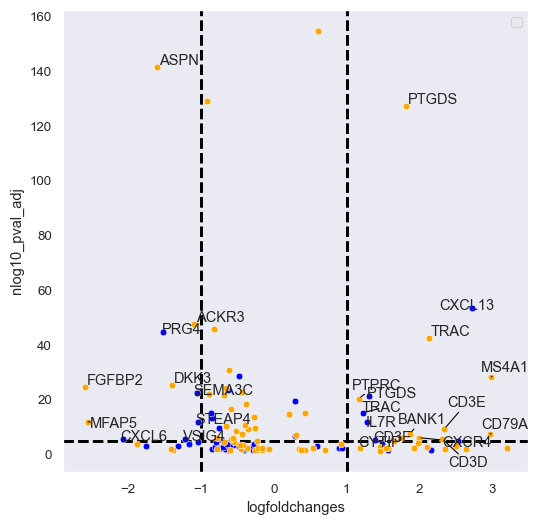

In [70]:
sns.set_style('dark')
sns.set_context('paper', font_scale=1.1)
plt.figure(figsize=(6, 6))

ax = sns.scatterplot(data=test_degs, x='logfoldchanges', y='nlog10_pval_adj', color= 'blue')
ax.axhline(5, zorder=0, c='k', lw=2, ls='--') # draw horizontal line at p_adj = 10^-5
ax.axvline(-1, zorder=0, c='k', lw=2, ls='--')
ax.axvline(1, zorder=0, c='k', lw=2, ls='--')

# Let's create a legend with the spatial domain labels

texts = []
for i in range(len(test_degs)):
    if test_degs.iloc[i].nlog10_pval_adj > 5 and abs(test_degs.iloc[i].logfoldchanges) > 1:
        texts.append(
            plt.text(test_degs.iloc[i].logfoldchanges, y=test_degs.iloc[i].nlog10_pval_adj, s=test_degs.iloc[i].names))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='k'))

ax = sns.scatterplot(data=test_degs_1, x='logfoldchanges', y='nlog10_pval_adj', color= 'orange')
ax.axhline(5, zorder=0, c='k', lw=2, ls='--')
ax.axvline(-1, zorder=0, c='k', lw=2, ls='--')
ax.axvline(1, zorder=0, c='k', lw=2, ls='--')

# Let's create a legend with the spatial domain labels

texts = []
for i in range(len(test_degs_1)):
    if test_degs_1.iloc[i].nlog10_pval_adj > 5 and abs(test_degs_1.iloc[i].logfoldchanges) > 1:
        texts.append(
            plt.text(test_degs_1.iloc[i].logfoldchanges, y=test_degs_1.iloc[i].nlog10_pval_adj, s=test_degs_1.iloc[i].names))
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='k'))
plt.legend()

In [77]:
# I think plotting all 5 spatial domains on 1 plot will be too cluttered; 
# Let's do it as spatial_domain x celltype
import glob
import os

# Specify the path to your CSV files
path_to_csv_files = '/Users/jacquelinechou/Downloads/s1_r3_spatial_domains_degs/*.csv'

# List all CSV files
csv_files = glob.glob(path_to_csv_files)

# Initialize an empty list to store the DataFrames
dataframes = []

# Iterate through the CSV files
for file in csv_files:
    # Read the CSV file
    df = pd.read_csv(file)
    # print(df.shape)
        # Check if the DataFrame is empty
    if df.empty:
        print(f"File {file} is empty and will be skipped.")
        continue
    # Extract the base filename without the directory and extension
    base_filename = os.path.basename(file)
    
    # Calculate the negative pval_adj
    df['nlog10_pval_adj'] = -np.log10(df.pvals_adj)
    # Extract 'Sublining fibroblasts' and 'sp_3' from the filename
    parts = base_filename.replace('.csv', '').split('_')
    celltype = parts[2]
    spatial_domain_value = parts[3]+'_'+parts[4]
    
    # Create new columns based on extracted information
    df['Celltype_tested'] = celltype
    df['Spatial_domain'] = spatial_domain_value
    
    # Append the DataFrame to the list
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)


File /Users/jacquelinechou/Downloads/s1_r3_spatial_domains_degs/s1_r3_Plasma cells_sp_1_degs.csv is empty and will be skipped.
File /Users/jacquelinechou/Downloads/s1_r3_spatial_domains_degs/s1_r3_Plasma cells_sp_0_degs.csv is empty and will be skipped.
File /Users/jacquelinechou/Downloads/s1_r3_spatial_domains_degs/s1_r3_Plasma cells_sp_3_degs.csv is empty and will be skipped.
File /Users/jacquelinechou/Downloads/s1_r3_spatial_domains_degs/s1_r3_Plasma cells_sp_4_degs.csv is empty and will be skipped.
File /Users/jacquelinechou/Downloads/s1_r3_spatial_domains_degs/s1_r3_Non-plasma B-cells_sp_3_degs.csv is empty and will be skipped.


/Users/jacquelinechou/Code/scanpy_env/venv/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [78]:
final_df

,Unnamed: 0,names,scores,logfoldchanges,pvals,pvals_adj,nlog10_pval_adj,Celltype_tested,Spatial_domain
0,0,TRAC,13.763593,0.487090,4.220201e-43,1.802026e-40,39.744239,T-cells,sp_1
1,1,PTPRC,8.885336,0.359357,6.372770e-19,4.535288e-17,16.343395,T-cells,sp_1
2,2,MS4A1,7.331244,1.699596,2.280260e-13,1.081857e-11,10.965830,T-cells,sp_1
3,3,SELL,6.375433,1.462504,1.824471e-10,6.232610e-09,8.205330,T-cells,sp_1
4,4,CD3E,6.114808,0.552898,9.667313e-10,2.763243e-08,7.558581,T-cells,sp_1
...,...,...,...,...,...,...,...,...,...
1222,38,MARCO,-6.857675,-0.367917,6.999011e-12,1.992385e-10,9.700627,Sublining fibroblasts,sp_4
1223,39,CFB,-7.482833,-0.360994,7.273701e-14,2.389131e-12,11.621760,Sublining fibroblasts,sp_4
1224,40,FCGR3A,-7.608529,-0.658499,2.772329e-14,1.076168e-12,11.968120,Sublining fibroblasts,sp_4
1225,41,TNC,-8.822002,-0.147085,1.124311e-18,5.334230e-17,16.272928,Sublining fibroblasts,sp_4


In [79]:
def custom_volcano_plot(data, x, y, color, **kwargs):
    ax = plt.gca()
    sns.scatterplot(data=data, x=x, y=y, color=color, ax=ax, **kwargs)
    
    # Add horizontal and vertical lines
    ax.axhline(5, zorder=0, c='k', lw=2, ls='--')
    ax.axvline(-1, zorder=0, c='k', lw=2, ls='--')
    ax.axvline(1, zorder=0, c='k', lw=2, ls='--')

    # Apply x-axis limits to each facet
    figure_grid.set(xlim=x_limits)
    # Add text annotations for significant points
    texts = []
    for i in range(len(data)):
        if data.iloc[i][y] > 5 and abs(data.iloc[i][x]) > 1:
            texts.append(
                plt.text(data.iloc[i][x], y=data.iloc[i][y], s=data.iloc[i]['names']))
    adjust_text(texts, ax = ax, arrowprops=dict(arrowstyle='-', color='k'))

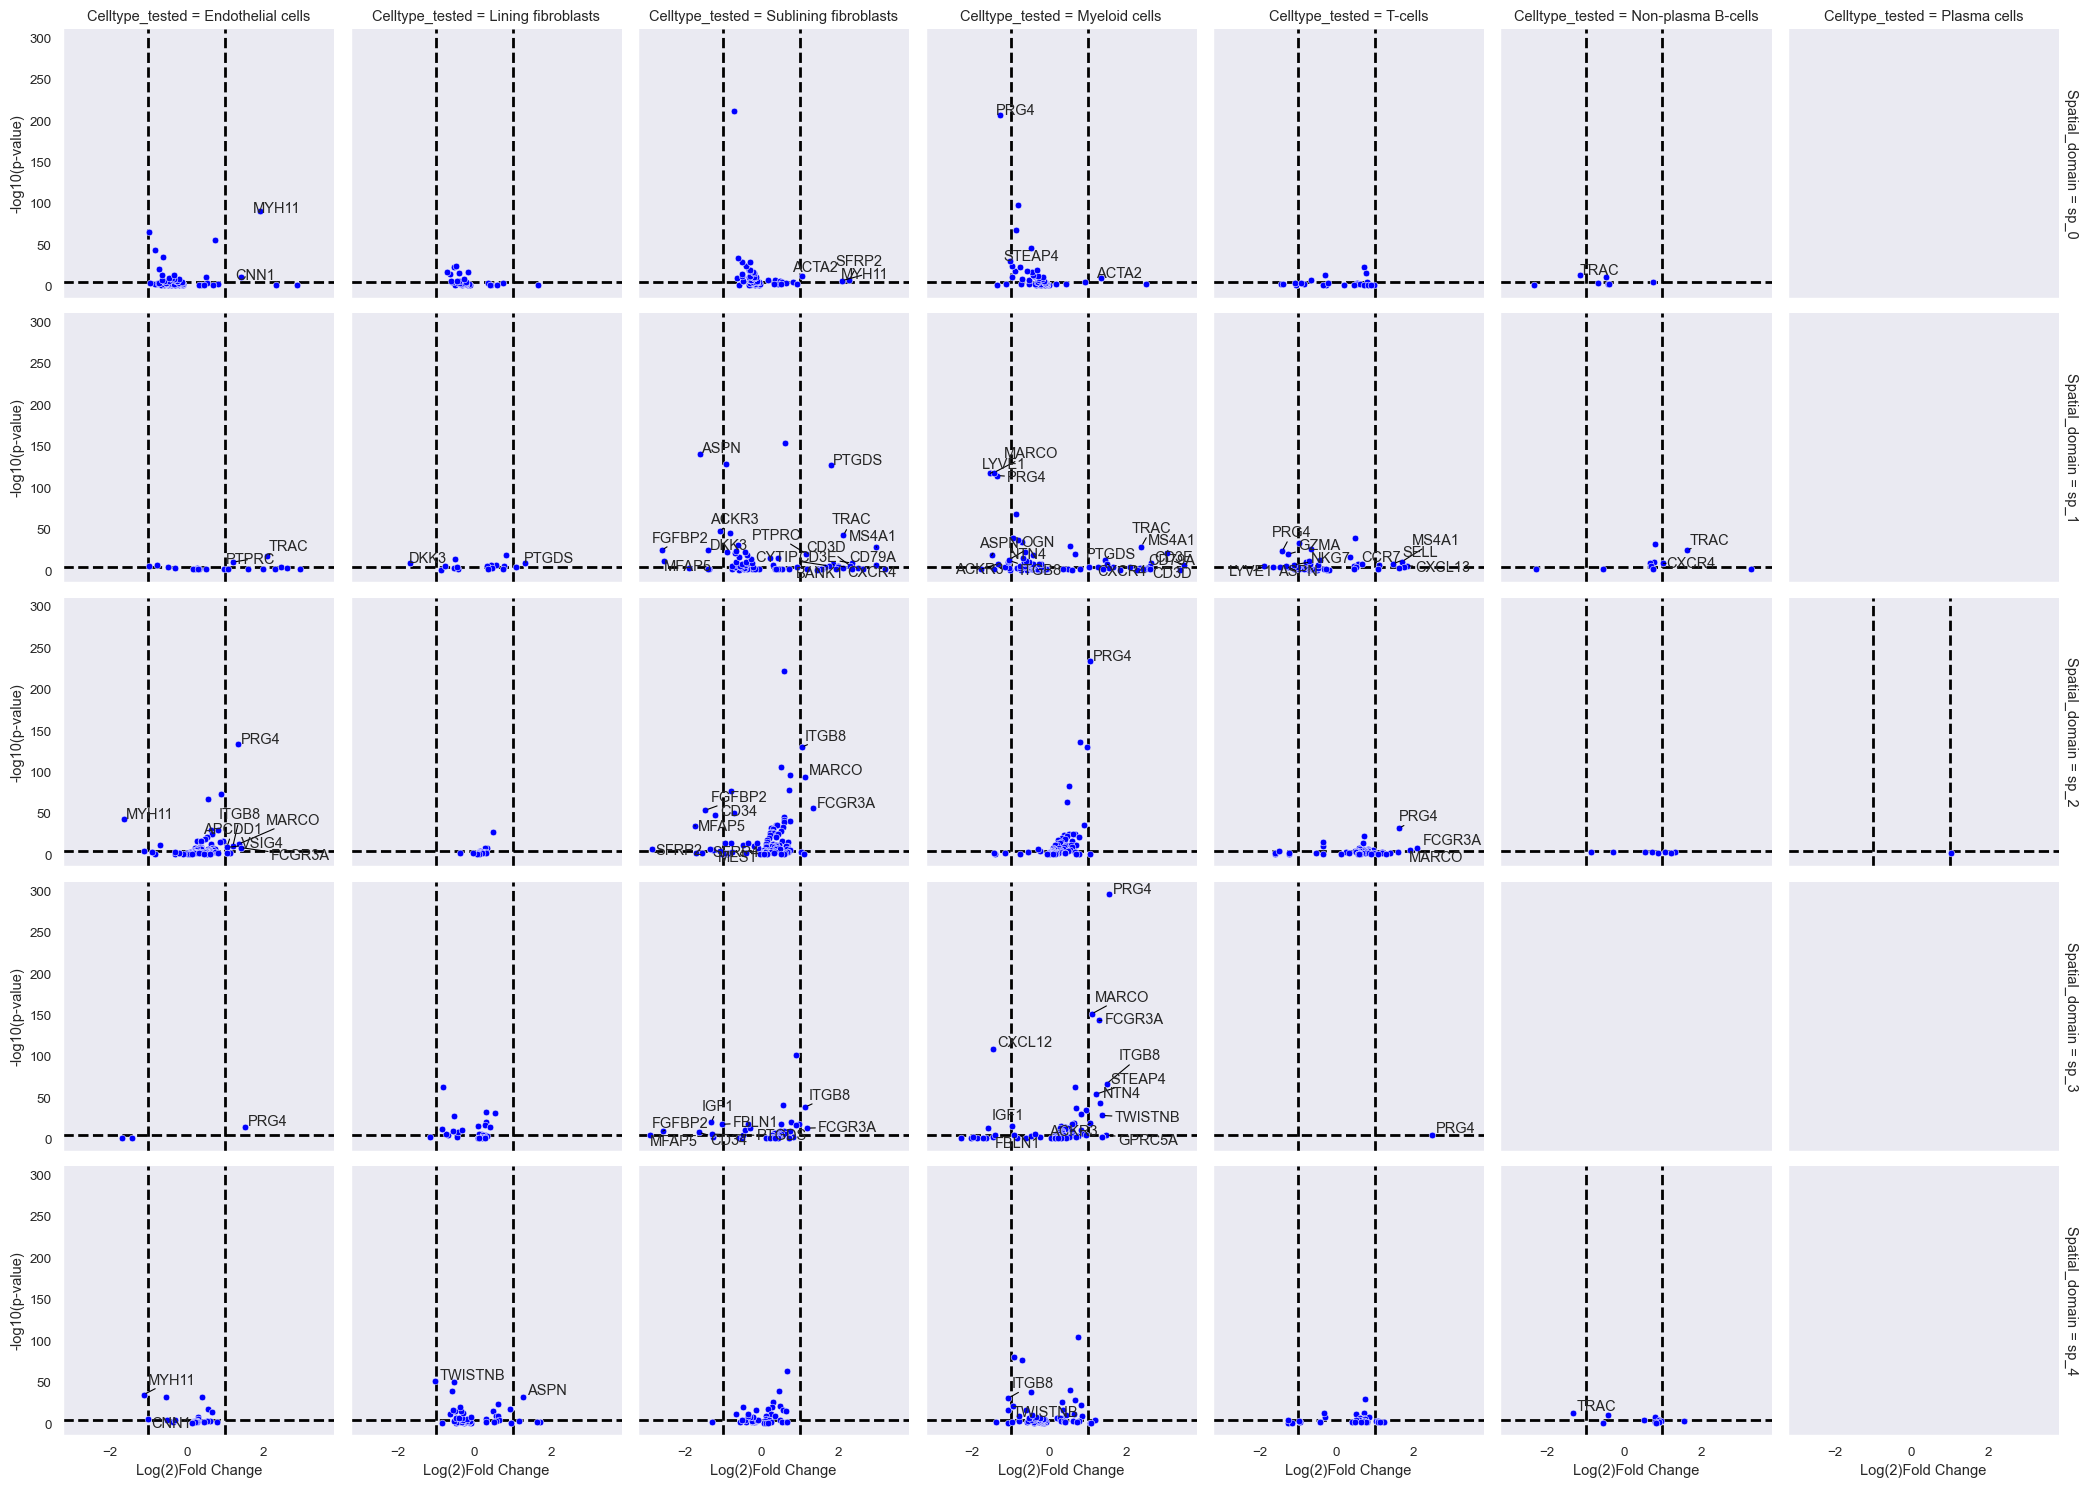

In [84]:
col_order = ['Endothelial cells', 'Lining fibroblasts', 'Sublining fibroblasts', 'Myeloid cells', 'T-cells', 
             'Non-plasma B-cells', 'Plasma cells']
row_order = ['sp_0', 'sp_1', 'sp_2', 'sp_3', 'sp_4']
s1_r3_grid = sns.FacetGrid(final_df, col='Celltype_tested', row='Spatial_domain', 
                           row_order= row_order, col_order = col_order, margin_titles= True)

# Map a histogram plot
s1_r3_grid.map_dataframe(custom_volcano_plot, x='logfoldchanges', y='nlog10_pval_adj', color='blue')

# Adjust plot titles and labels
# for ax in s1_r3_grid.axes.flat:
#     col_val = ax.get_title().split('|')[1].strip()
#     row_val = ax.get_title().split('|')[0].strip()
#     title = f'{row_val} | {col_val}'
#     ax.set_title(title, fontsize = 10)
    
s1_r3_grid.set_axis_labels('Log(2)Fold Change', '-log10(p-value)')

plt.savefig('/Users/jacquelinechou/Downloads/s1_r3_spatial_domains_degs/s1_r3_volcano_plot_spatial_domain_by_celltype.png')
# Show the plot
plt.show()


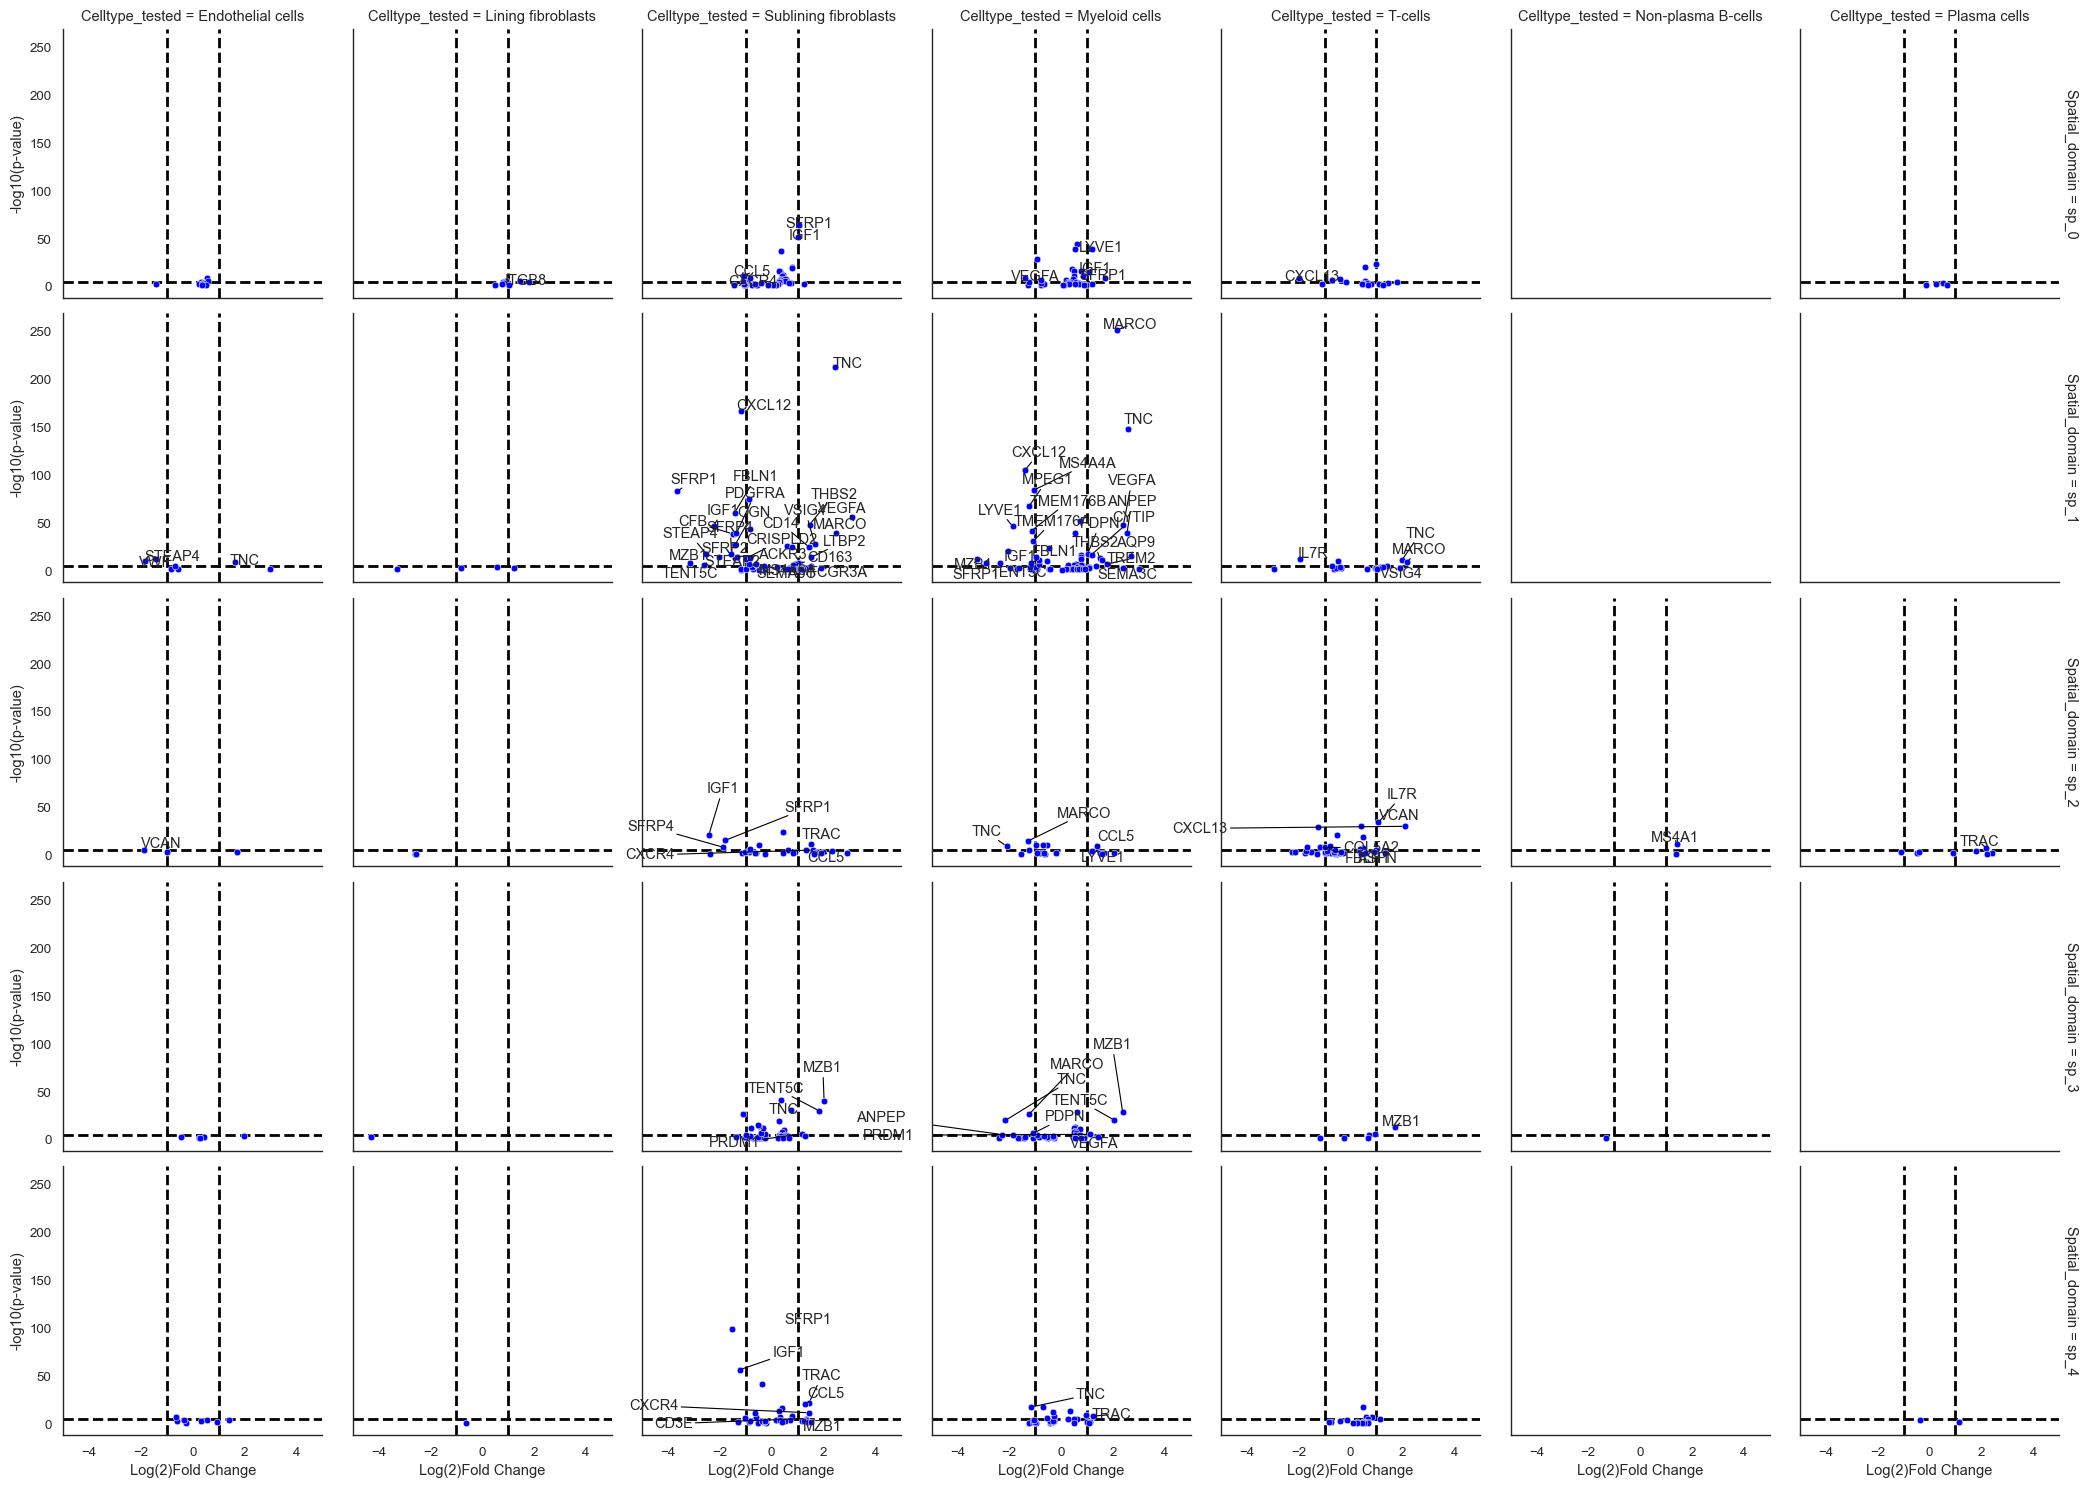

In [89]:
# Wrote a script to make volcano plots for all tissues
# But the automatic axes are squishing the results for slide1_r1, so let's fix it by setting the y-axis limits
sns.set_style('white')
sns.set_context('paper', font_scale=1.1)
s1_r1_df = pd.read_csv('/Users/jacquelinechou/Downloads/cohort_spatial_domains_degs/volcano_plots_and_df/slide1_r1_spatial_domain_degs_concatenated.csv')
col_order = ['Endothelial cells', 'Lining fibroblasts', 'Sublining fibroblasts', 'Myeloid cells', 'T-cells', 
             'Non-plasma B-cells', 'Plasma cells']
row_order = ['sp_0', 'sp_1', 'sp_2', 'sp_3', 'sp_4']
figure_grid = sns.FacetGrid(s1_r1_df, col='Celltype_tested', row='Spatial_domain', 
                           row_order= row_order, col_order = col_order, margin_titles= True)

# Map a histogram plot
figure_grid.map_dataframe(custom_volcano_plot, x='logfoldchanges', y='nlog10_pval_adj', color='blue')
    
figure_grid.set_axis_labels('Log(2)Fold Change', '-log10(p-value)')

x_limits = (-5, 5)
for ax in figure_grid.axes.flat:
    ax.set_xlim(x_limits)
plt.savefig('/Users/jacquelinechou/Downloads/s1_r1_volcano_plot_spatial_domain_by_celltype_xlims_abs(2).png')
# Show the plot
plt.show()
